In [35]:
# ============================================
# Pneumonia Detection - Data Exploration (EDA)
# ============================================
# Project: Chest X-Ray Classification
# Team: Ahmed Ben Attia Khiari, Achref Ghorbel
# Module: Deep Learning - Computer Vision
# Professor: Haythem Ghazouani
# ============================================

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set professional plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Dataset path
DATA_PATH = r"C:\Users\mbena\Downloads\datasetProjetfed"

print("=" * 60)
print("  PNEUMONIA DETECTION - EXPLORATORY DATA ANALYSIS")
print("=" * 60)
print(f"\nDataset path: {DATA_PATH}")
print(f"Folders found: {os.listdir(DATA_PATH)}")
print("\n✅ Setup complete!")

  PNEUMONIA DETECTION - EXPLORATORY DATA ANALYSIS

Dataset path: C:\Users\mbena\Downloads\datasetProjetfed
Folders found: ['chest_xray']

✅ Setup complete!


In [37]:
# ============================================
# Cell 2: Dataset Structure & Distribution
# ============================================

# Update path to include chest_xray subfolder
DATA_PATH = r"C:\Users\mbena\Downloads\datasetProjetfed\chest_xray"

# Count images in each folder
splits = ['train', 'test', 'val']
class_names = ['NORMAL', 'PNEUMONIA']

print("=" * 60)
print("  DATASET STRUCTURE & DISTRIBUTION")
print("=" * 60)

total_images = 0
distribution = {}

for split in splits:
    print(f"\n📁 {split.upper()}/")
    distribution[split] = {}
    for cls in class_names:
        folder_path = os.path.join(DATA_PATH, split, cls)
        if os.path.exists(folder_path):
            count = len([f for f in os.listdir(folder_path) 
                        if f.endswith(('.jpeg', '.jpg', '.png'))])
            distribution[split][cls] = count
            total_images += count
            print(f"   ├── {cls}: {count:,} images")
        else:
            print(f"   ├── {cls}: ❌ Folder not found")
            distribution[split][cls] = 0
    
    split_total = sum(distribution[split].values())
    print(f"   └── Total: {split_total:,} images")

print(f"\n{'=' * 60}")
print(f"  TOTAL IMAGES: {total_images:,}")
print(f"{'=' * 60}")

# Class imbalance analysis
train_normal = distribution['train']['NORMAL']
train_pneumonia = distribution['train']['PNEUMONIA']
ratio = train_pneumonia / train_normal

print(f"\n⚠️  CLASS IMBALANCE ANALYSIS (Training Set):")
print(f"   NORMAL:    {train_normal:,} ({train_normal/(train_normal+train_pneumonia)*100:.1f}%)")
print(f"   PNEUMONIA: {train_pneumonia:,} ({train_pneumonia/(train_normal+train_pneumonia)*100:.1f}%)")
print(f"   Ratio:     1:{ratio:.2f} (PNEUMONIA is {ratio:.1f}x more)")

  DATASET STRUCTURE & DISTRIBUTION

📁 TRAIN/
   ├── NORMAL: 1,341 images
   ├── PNEUMONIA: 3,875 images
   └── Total: 5,216 images

📁 TEST/
   ├── NORMAL: 234 images
   ├── PNEUMONIA: 390 images
   └── Total: 624 images

📁 VAL/
   ├── NORMAL: 8 images
   ├── PNEUMONIA: 8 images
   └── Total: 16 images

  TOTAL IMAGES: 5,856

⚠️  CLASS IMBALANCE ANALYSIS (Training Set):
   NORMAL:    1,341 (25.7%)
   PNEUMONIA: 3,875 (74.3%)
   Ratio:     1:2.89 (PNEUMONIA is 2.9x more)


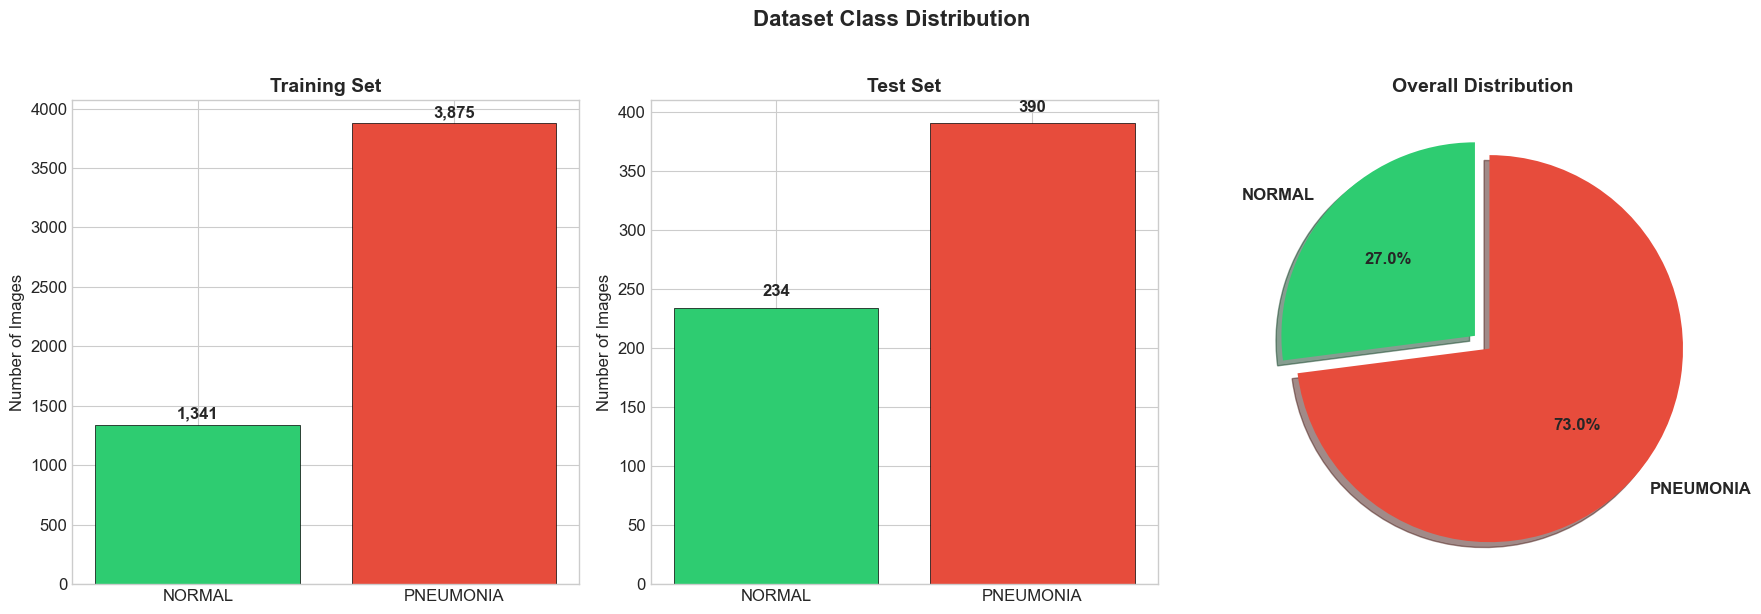

✅ Distribution plots saved!

📊 Key Insight: Dataset is IMBALANCED
   → PNEUMONIA images are 2.9x more than NORMAL
   → Will need: class weights, data augmentation, or oversampling


In [39]:
# ============================================
# Cell 3: Distribution Visualization
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['#2ecc71', '#e74c3c']  # Green for Normal, Red for Pneumonia

# Plot 1: Training set distribution
train_counts = [distribution['train']['NORMAL'], distribution['train']['PNEUMONIA']]
bars1 = axes[0].bar(class_names, train_counts, color=colors, edgecolor='black', linewidth=0.5)
axes[0].set_title('Training Set', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Images', fontsize=12)
for bar, count in zip(bars1, train_counts):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                f'{count:,}', ha='center', fontsize=12, fontweight='bold')

# Plot 2: Test set distribution
test_counts = [distribution['test']['NORMAL'], distribution['test']['PNEUMONIA']]
bars2 = axes[1].bar(class_names, test_counts, color=colors, edgecolor='black', linewidth=0.5)
axes[1].set_title('Test Set', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Images', fontsize=12)
for bar, count in zip(bars2, test_counts):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                f'{count:,}', ha='center', fontsize=12, fontweight='bold')

# Plot 3: Overall pie chart
total_normal = sum(distribution[s]['NORMAL'] for s in splits)
total_pneumonia = sum(distribution[s]['PNEUMONIA'] for s in splits)
axes[2].pie([total_normal, total_pneumonia], labels=class_names, colors=colors,
            autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'},
            explode=(0.05, 0.05), shadow=True)
axes[2].set_title('Overall Distribution', fontsize=14, fontweight='bold')

plt.suptitle('Dataset Class Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Distribution plots saved!")
print(f"\n📊 Key Insight: Dataset is IMBALANCED")
print(f"   → PNEUMONIA images are {train_pneumonia/train_normal:.1f}x more than NORMAL")
print(f"   → Will need: class weights, data augmentation, or oversampling")

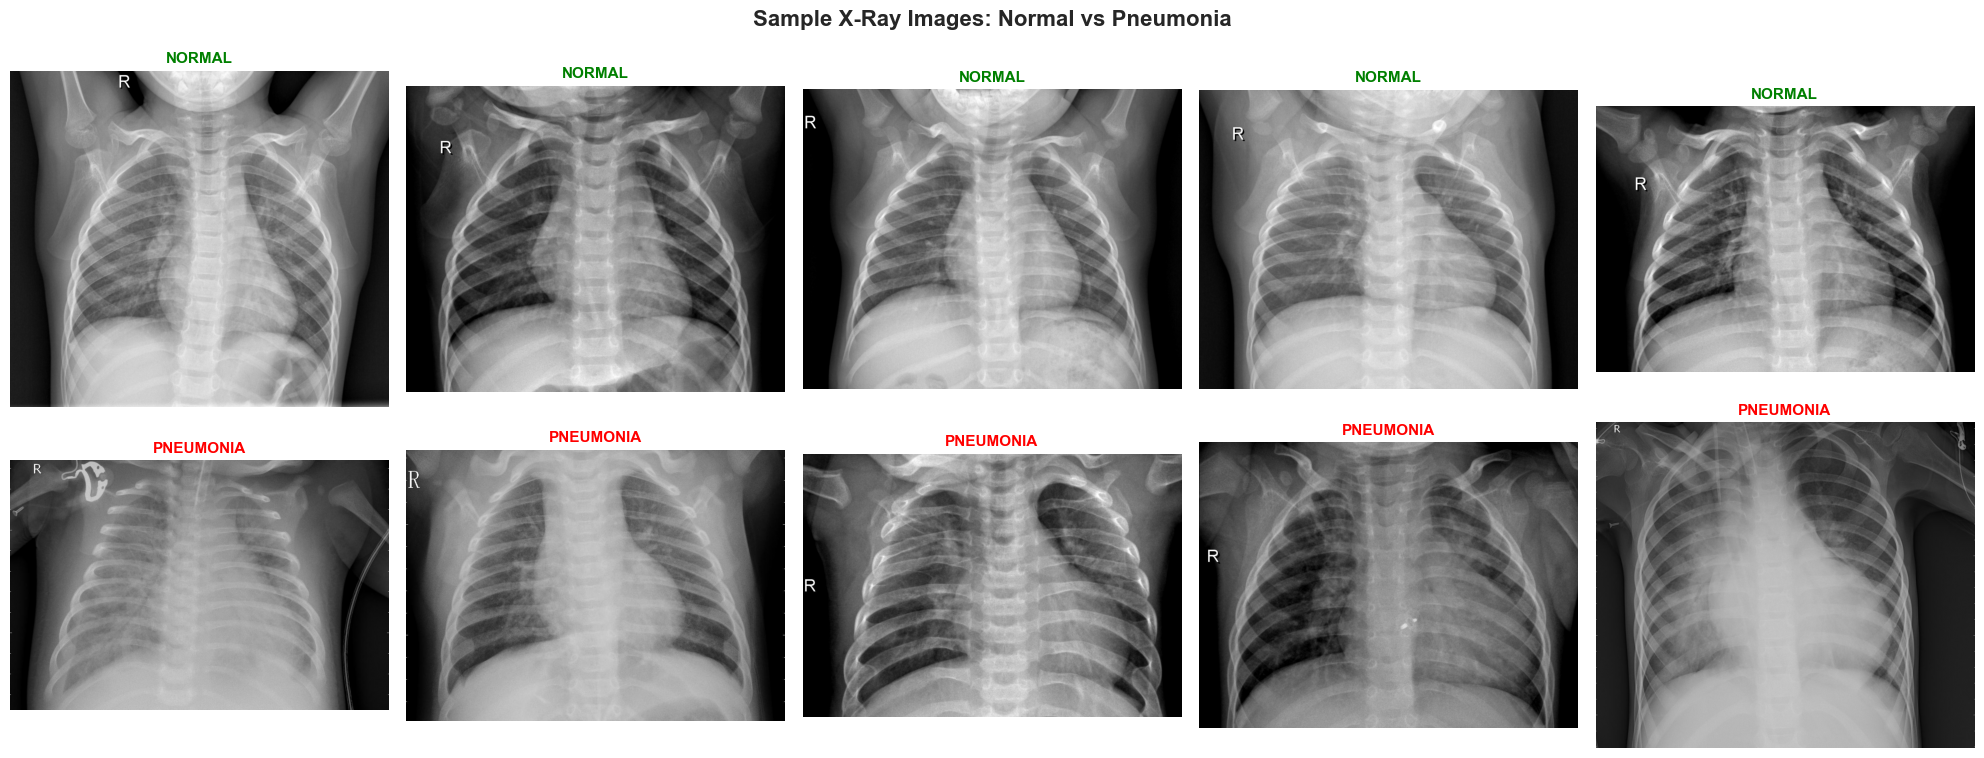

✅ Sample images displayed!

🔍 Visual Observations:
   → NORMAL: Clear lung fields, no opacities
   → PNEUMONIA: White patches/opacities visible in lung areas


In [43]:
# ============================================
# Cell 4: Sample Images - Normal vs Pneumonia
# ============================================

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Show 5 NORMAL images
normal_path = os.path.join(DATA_PATH, 'train', 'NORMAL')
normal_images = os.listdir(normal_path)[:5]

for i, img_name in enumerate(normal_images):
    img = Image.open(os.path.join(normal_path, img_name))
    axes[0][i].imshow(img, cmap='gray')
    axes[0][i].set_title(f'NORMAL', fontsize=11, color='green', fontweight='bold')
    axes[0][i].axis('off')
    if i == 0:
        axes[0][i].set_ylabel('NORMAL', fontsize=14, fontweight='bold', color='green')

# Show 5 PNEUMONIA images
pneumonia_path = os.path.join(DATA_PATH, 'train', 'PNEUMONIA')
pneumonia_images = os.listdir(pneumonia_path)[:5]

for i, img_name in enumerate(pneumonia_images):
    img = Image.open(os.path.join(pneumonia_path, img_name))
    axes[1][i].imshow(img, cmap='gray')
    axes[1][i].set_title(f'PNEUMONIA', fontsize=11, color='red', fontweight='bold')
    axes[1][i].axis('off')
    if i == 0:
        axes[1][i].set_ylabel('PNEUMONIA', fontsize=14, fontweight='bold', color='red')

plt.suptitle('Sample X-Ray Images: Normal vs Pneumonia', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Sample images displayed!")
print("\n🔍 Visual Observations:")
print("   → NORMAL: Clear lung fields, no opacities")
print("   → PNEUMONIA: White patches/opacities visible in lung areas")

  IMAGE SIZE & PROPERTIES ANALYSIS

⏳ Analyzing image dimensions (this may take a minute)...

📐 IMAGE DIMENSIONS:
   Width  → Min: 384, Max: 2916, Mean: 1328
   Height → Min: 127, Max: 2713, Mean: 971
   Aspect Ratio → Min: 0.84, Max: 3.38, Mean: 1.44

📦 FILE SIZES:
   Min: 5.3 KB
   Max: 2357.8 KB
   Mean: 206.3 KB

🎨 CHANNELS:
   Grayscale: 5,557 images (95.2%)
   RGB: 283 images (4.8%)


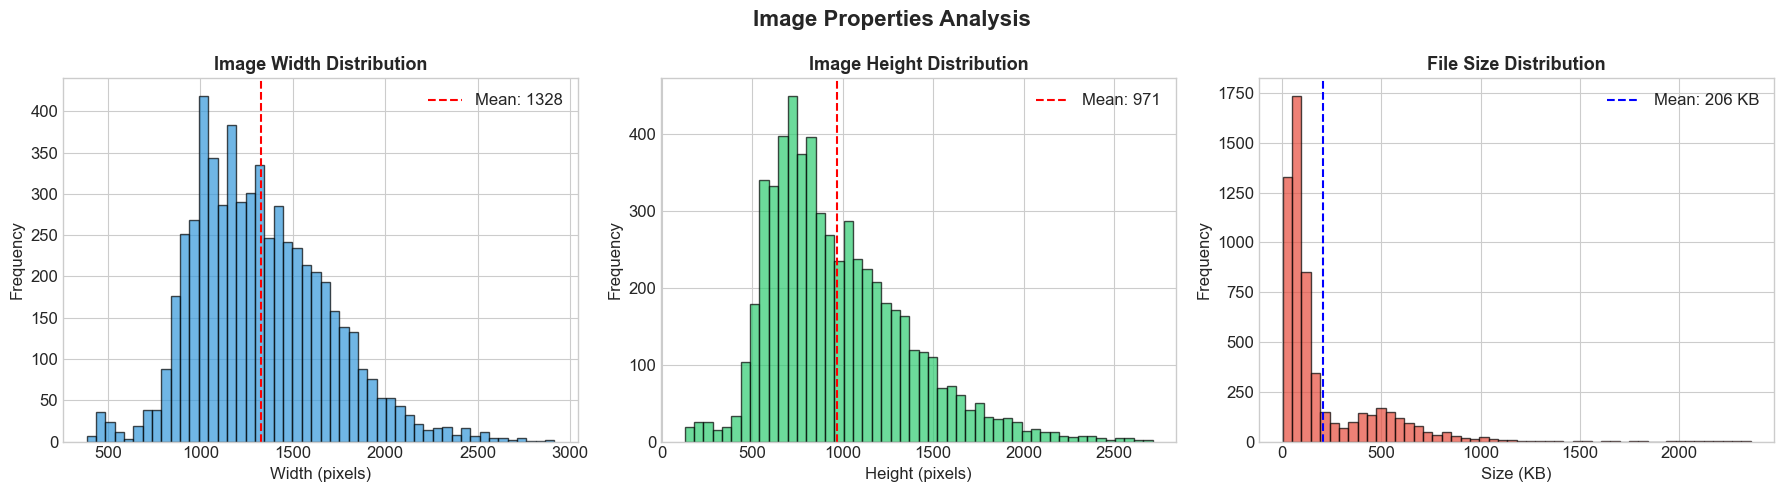


✅ Image analysis complete!

💡 Key Insight: Images vary in size → Must resize all to 224x224 for EfficientNet


In [45]:
# ============================================
# Cell 5: Image Size & Properties Analysis
# ============================================

print("=" * 60)
print("  IMAGE SIZE & PROPERTIES ANALYSIS")
print("=" * 60)
print("\n⏳ Analyzing image dimensions (this may take a minute)...")

widths = []
heights = []
aspect_ratios = []
file_sizes = []
channels_list = []

for split in ['train', 'test']:
    for cls in class_names:
        folder = os.path.join(DATA_PATH, split, cls)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            try:
                img = Image.open(img_path)
                w, h = img.size
                widths.append(w)
                heights.append(h)
                aspect_ratios.append(w / h)
                file_sizes.append(os.path.getsize(img_path) / 1024)  # KB
                channels_list.append(len(img.getbands()))
            except:
                pass

print(f"\n📐 IMAGE DIMENSIONS:")
print(f"   Width  → Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.0f}")
print(f"   Height → Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.0f}")
print(f"   Aspect Ratio → Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}, Mean: {np.mean(aspect_ratios):.2f}")

print(f"\n📦 FILE SIZES:")
print(f"   Min: {min(file_sizes):.1f} KB")
print(f"   Max: {max(file_sizes):.1f} KB")
print(f"   Mean: {np.mean(file_sizes):.1f} KB")

print(f"\n🎨 CHANNELS:")
channel_counts = Counter(channels_list)
for ch, count in channel_counts.items():
    mode = "Grayscale" if ch == 1 else "RGB" if ch == 3 else f"{ch}ch"
    print(f"   {mode}: {count:,} images ({count/len(channels_list)*100:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Width distribution
axes[0].hist(widths, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(x=np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.0f}')
axes[0].set_title('Image Width Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot 2: Height distribution
axes[1].hist(heights, bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1].axvline(x=np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.0f}')
axes[1].set_title('Image Height Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot 3: File size distribution
axes[2].hist(file_sizes, bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[2].axvline(x=np.mean(file_sizes), color='blue', linestyle='--', label=f'Mean: {np.mean(file_sizes):.0f} KB')
axes[2].set_title('File Size Distribution', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Size (KB)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Image Properties Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('image_properties.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Image analysis complete!")
print(f"\n💡 Key Insight: Images vary in size → Must resize all to 224x224 for EfficientNet")

  PIXEL INTENSITY ANALYSIS

⏳ Analyzing pixel distributions...


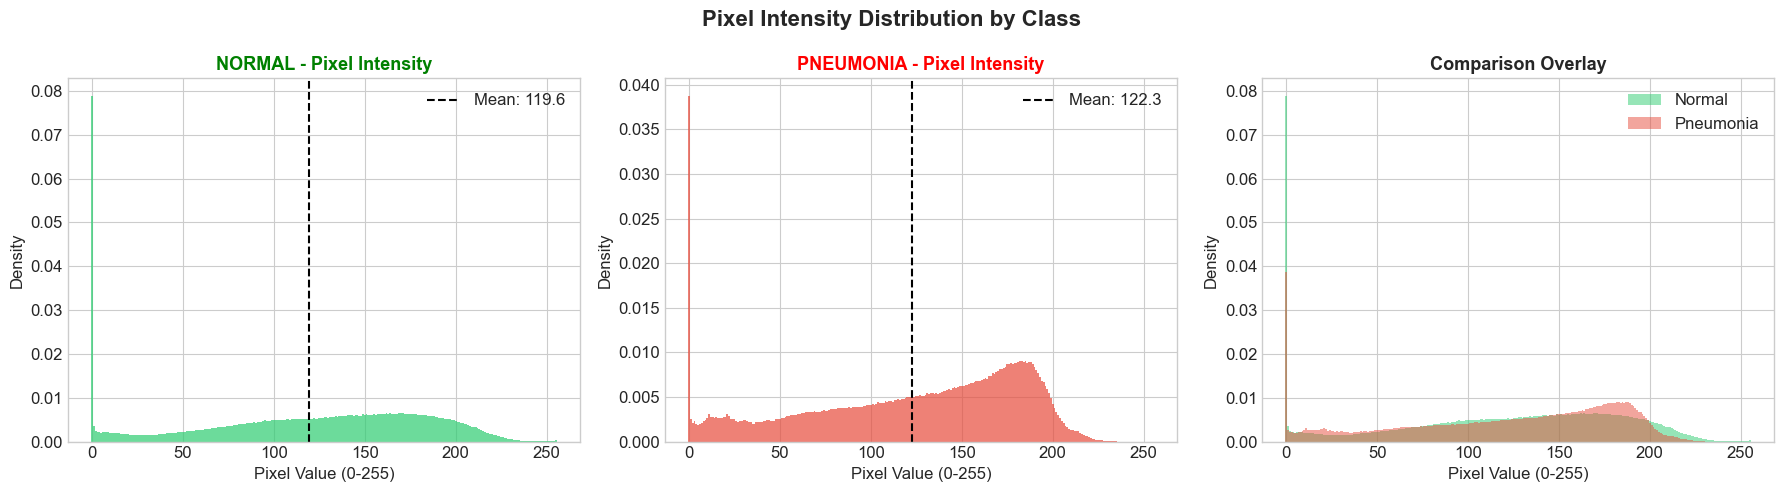


📊 INTENSITY STATISTICS:
   NORMAL    → Mean: 119.6
   PNEUMONIA → Mean: 122.3

💡 Mean Difference: 2.7
   → Minimal intensity difference — model will need to learn spatial patterns

✅ Pixel intensity analysis complete!


In [11]:
# ============================================
# Cell 6: Pixel Intensity Analysis (Memory Efficient)
# ============================================

print("=" * 60)
print("  PIXEL INTENSITY ANALYSIS")
print("=" * 60)
print("\n⏳ Analyzing pixel distributions...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

normal_folder = os.path.join(DATA_PATH, 'train', 'NORMAL')
pneumonia_folder = os.path.join(DATA_PATH, 'train', 'PNEUMONIA')

# Use histograms instead of storing all pixels
normal_hist = np.zeros(256)
pneumonia_hist = np.zeros(256)
normal_mean_sum, normal_count = 0, 0
pneumonia_mean_sum, pneumonia_count = 0, 0

# Sample 100 images per class — resize SMALL first
for img_name in os.listdir(normal_folder)[:100]:
    try:
        img = Image.open(os.path.join(normal_folder, img_name)).convert('L').resize((128, 128))
        arr = np.array(img)
        hist, _ = np.histogram(arr, bins=256, range=(0, 255))
        normal_hist += hist
        normal_mean_sum += arr.mean()
        normal_count += 1
    except:
        pass

for img_name in os.listdir(pneumonia_folder)[:100]:
    try:
        img = Image.open(os.path.join(pneumonia_folder, img_name)).convert('L').resize((128, 128))
        arr = np.array(img)
        hist, _ = np.histogram(arr, bins=256, range=(0, 255))
        pneumonia_hist += hist
        pneumonia_mean_sum += arr.mean()
        pneumonia_count += 1
    except:
        pass

# Normalize histograms
normal_hist = normal_hist / normal_hist.sum()
pneumonia_hist = pneumonia_hist / pneumonia_hist.sum()
normal_mean = normal_mean_sum / normal_count
pneumonia_mean = pneumonia_mean_sum / pneumonia_count

# Plot 1: Normal
axes[0].bar(range(256), normal_hist, color='#2ecc71', alpha=0.7, width=1)
axes[0].set_title('NORMAL - Pixel Intensity', fontsize=13, fontweight='bold', color='green')
axes[0].set_xlabel('Pixel Value (0-255)')
axes[0].set_ylabel('Density')
axes[0].axvline(x=normal_mean, color='black', linestyle='--', label=f'Mean: {normal_mean:.1f}')
axes[0].legend()

# Plot 2: Pneumonia
axes[1].bar(range(256), pneumonia_hist, color='#e74c3c', alpha=0.7, width=1)
axes[1].set_title('PNEUMONIA - Pixel Intensity', fontsize=13, fontweight='bold', color='red')
axes[1].set_xlabel('Pixel Value (0-255)')
axes[1].set_ylabel('Density')
axes[1].axvline(x=pneumonia_mean, color='black', linestyle='--', label=f'Mean: {pneumonia_mean:.1f}')
axes[1].legend()

# Plot 3: Overlay
axes[2].bar(range(256), normal_hist, color='#2ecc71', alpha=0.5, width=1, label='Normal')
axes[2].bar(range(256), pneumonia_hist, color='#e74c3c', alpha=0.5, width=1, label='Pneumonia')
axes[2].set_title('Comparison Overlay', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Pixel Value (0-255)')
axes[2].set_ylabel('Density')
axes[2].legend()

plt.suptitle('Pixel Intensity Distribution by Class', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('pixel_intensity.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistics
print(f"\n📊 INTENSITY STATISTICS:")
print(f"   NORMAL    → Mean: {normal_mean:.1f}")
print(f"   PNEUMONIA → Mean: {pneumonia_mean:.1f}")

mean_diff = abs(normal_mean - pneumonia_mean)
print(f"\n💡 Mean Difference: {mean_diff:.1f}")

if mean_diff > 5:
    print(f"   → Notable intensity difference between classes")
    print(f"   → Pneumonia images tend to have {'brighter' if pneumonia_mean > normal_mean else 'darker'} regions")
else:
    print(f"   → Minimal intensity difference — model will need to learn spatial patterns")

print("\n✅ Pixel intensity analysis complete!")

  VALIDATION SET PROBLEM

⚠️  CURRENT VALIDATION SET:
   NORMAL:    8 images
   PNEUMONIA: 8 images
   TOTAL:     16 images

❌ PROBLEM: 16 images is TOO SMALL for validation!
   → Cannot reliably evaluate model performance
   → Need at least 500+ images for meaningful validation

✅ SOLUTION: Split training set 80/20
   → Training:   4,172 images (80%)
   → Validation:  1,043 images (20%)


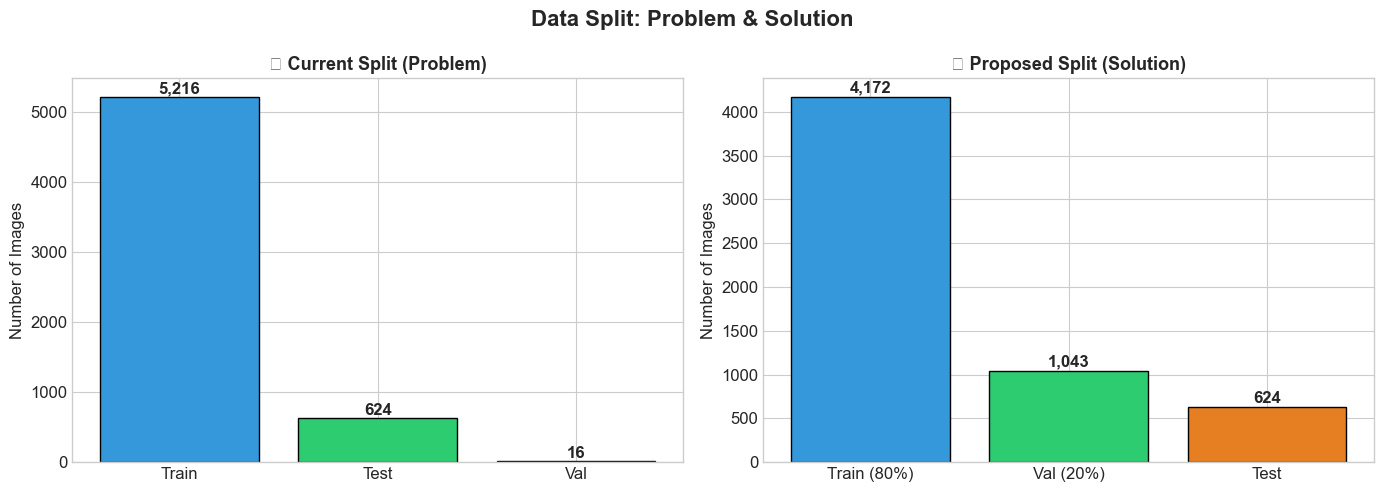


💡 IMPLEMENTATION PLAN:
   → Use PyTorch random_split() on training set
   → Keep original test set (624 images) untouched
   → Ignore original val set (16 images)

✅ Validation set analysis complete!


In [47]:
# ============================================
# Cell 7: Validation Set Analysis & Fix
# ============================================

print("=" * 60)
print("  VALIDATION SET PROBLEM")
print("=" * 60)

val_normal = distribution['val']['NORMAL']
val_pneumonia = distribution['val']['PNEUMONIA']

print(f"\n⚠️  CURRENT VALIDATION SET:")
print(f"   NORMAL:    {val_normal} images")
print(f"   PNEUMONIA: {val_pneumonia} images")
print(f"   TOTAL:     {val_normal + val_pneumonia} images")

print(f"\n❌ PROBLEM: {val_normal + val_pneumonia} images is TOO SMALL for validation!")
print(f"   → Cannot reliably evaluate model performance")
print(f"   → Need at least 500+ images for meaningful validation")

print(f"\n✅ SOLUTION: Split training set 80/20")
print(f"   → Training:   {int(5216 * 0.8):,} images (80%)")
print(f"   → Validation:  {int(5216 * 0.2):,} images (20%)")

# Visualize the problem and solution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Current split (PROBLEM)
current_sizes = [5216, 624, 16]
colors_bad = ['#3498db', '#2ecc71', '#e74c3c']
bars1 = axes[0].bar(['Train', 'Test', 'Val'], current_sizes, color=colors_bad, edgecolor='black')
axes[0].set_title('❌ Current Split (Problem)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Images')
for bar, count in zip(bars1, current_sizes):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'{count:,}', ha='center', fontsize=12, fontweight='bold')

# Plot 2: Proposed fix
new_train = int(5216 * 0.8)
new_val = int(5216 * 0.2)
new_sizes = [new_train, new_val, 624]
colors_good = ['#3498db', '#2ecc71', '#e67e22']
bars2 = axes[1].bar(['Train (80%)', 'Val (20%)', 'Test'], new_sizes, color=colors_good, edgecolor='black')
axes[1].set_title('✅ Proposed Split (Solution)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Number of Images')
for bar, count in zip(bars2, new_sizes):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'{count:,}', ha='center', fontsize=12, fontweight='bold')

plt.suptitle('Data Split: Problem & Solution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('data_split_fix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 IMPLEMENTATION PLAN:")
print("   → Use PyTorch random_split() on training set")
print("   → Keep original test set (624 images) untouched")
print("   → Ignore original val set (16 images)")
print("\n✅ Validation set analysis complete!")

In [15]:
# ============================================
# Cell 8: Image Quality Check
# ============================================

print("=" * 60)
print("  IMAGE QUALITY CHECK")
print("=" * 60)
print("\n⏳ Scanning for corrupted or suspicious images...")

corrupted = []
very_small = []
very_large = []
low_quality = []

for split in ['train', 'test', 'val']:
    for cls in class_names:
        folder = os.path.join(DATA_PATH, split, cls)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            try:
                img = Image.open(img_path)
                img.verify()  # Check if image is corrupted
                
                # Reopen after verify
                img = Image.open(img_path)
                w, h = img.size
                file_size = os.path.getsize(img_path) / 1024  # KB
                
                # Flag suspicious images
                if w < 100 or h < 100:
                    very_small.append((img_path, w, h))
                if w > 3000 or h > 3000:
                    very_large.append((img_path, w, h))
                if file_size < 10:  # Less than 10KB is suspicious
                    low_quality.append((img_path, file_size))
                    
            except Exception as e:
                corrupted.append((img_path, str(e)))

print(f"\n📊 RESULTS:")
print(f"   Corrupted images:  {len(corrupted)}")
print(f"   Very small (<100px): {len(very_small)}")
print(f"   Very large (>3000px): {len(very_large)}")
print(f"   Low quality (<10KB):  {len(low_quality)}")

if corrupted:
    print(f"\n❌ CORRUPTED FILES:")
    for path, error in corrupted[:5]:
        print(f"   → {os.path.basename(path)}: {error}")
else:
    print(f"\n✅ No corrupted images found!")

if very_small:
    print(f"\n⚠️  VERY SMALL IMAGES:")
    for path, w, h in very_small[:5]:
        print(f"   → {os.path.basename(path)}: {w}x{h}")

if low_quality:
    print(f"\n⚠️  LOW QUALITY FILES (<10KB):")
    for path, size in low_quality[:5]:
        print(f"   → {os.path.basename(path)}: {size:.1f} KB")

# Summary
total_issues = len(corrupted) + len(very_small) + len(very_large) + len(low_quality)
total_images = 5856

print(f"\n{'=' * 60}")
print(f"  QUALITY SUMMARY")
print(f"{'=' * 60}")
print(f"   Total images scanned: {total_images:,}")
print(f"   Issues found: {total_issues}")
print(f"   Clean images: {total_images - total_issues:,} ({(total_images - total_issues)/total_images*100:.1f}%)")

if total_issues == 0:
    print(f"\n✅ Dataset is clean! No quality issues detected.")
else:
    print(f"\n💡 Action: {'Remove' if corrupted else 'Monitor'} flagged images during preprocessing")

print("\n✅ Quality check complete!")

  IMAGE QUALITY CHECK

⏳ Scanning for corrupted or suspicious images...

📊 RESULTS:
   Corrupted images:  0
   Very small (<100px): 0
   Very large (>3000px): 0
   Low quality (<10KB):  43

✅ No corrupted images found!

⚠️  LOW QUALITY FILES (<10KB):
   → person1311_bacteria_3312.jpeg: 8.9 KB
   → person1669_bacteria_4422.jpeg: 8.3 KB
   → person1676_bacteria_4441.jpeg: 7.4 KB
   → person1677_bacteria_4444.jpeg: 8.7 KB
   → person1679_bacteria_4448.jpeg: 5.6 KB

  QUALITY SUMMARY
   Total images scanned: 5,856
   Issues found: 43
   Clean images: 5,813 (99.3%)

💡 Action: Monitor flagged images during preprocessing

✅ Quality check complete!


  LOW QUALITY IMAGE INSPECTION


NameError: name 'low_quality' is not defined

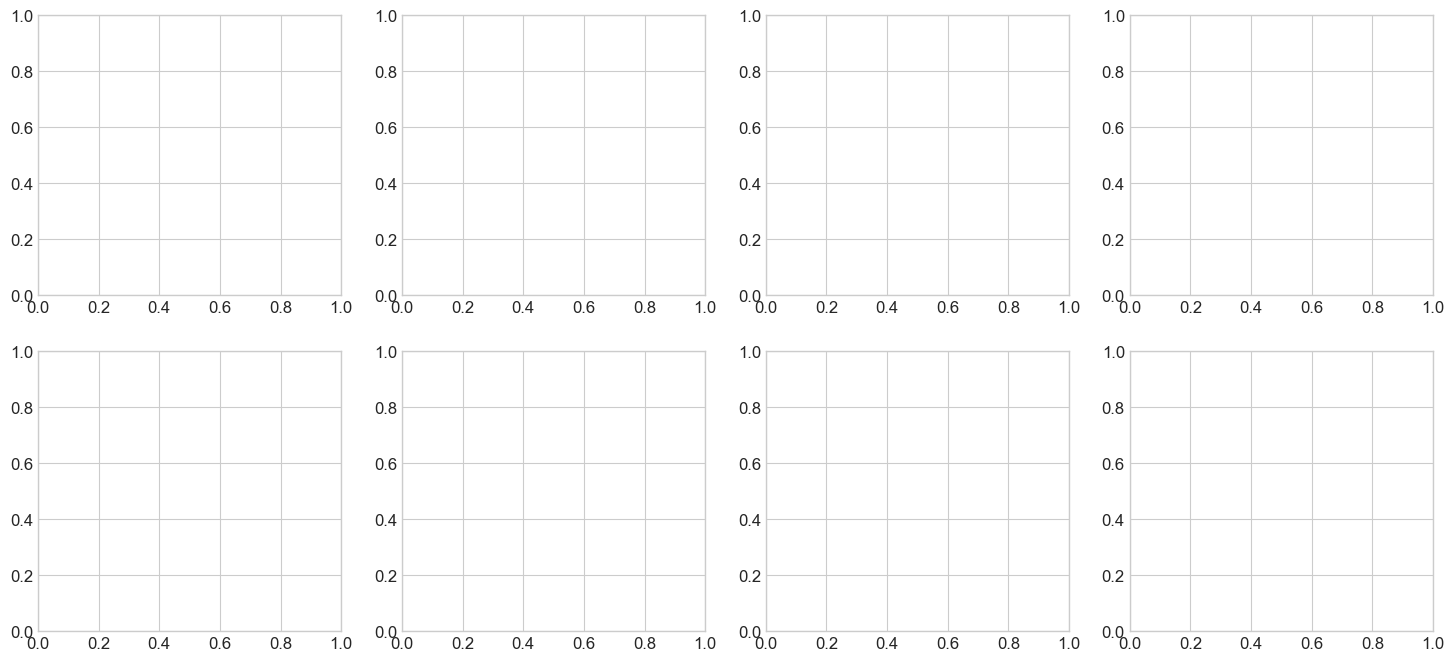

In [49]:
# ============================================
# Cell 9: Inspect Low Quality Images
# ============================================

print("=" * 60)
print("  LOW QUALITY IMAGE INSPECTION")
print("=" * 60)

# Show first 8 low quality images
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for i, (path, size) in enumerate(low_quality[:8]):
    row = i // 4
    col = i % 4
    try:
        img = Image.open(path)
        axes[row][col].imshow(img, cmap='gray')
        axes[row][col].set_title(f'{size:.1f} KB', fontsize=11, fontweight='bold', color='orange')
        axes[row][col].axis('off')
    except:
        axes[row][col].set_title('Failed to load', color='red')
        axes[row][col].axis('off')

plt.suptitle('Low Quality Images (<10KB) — Are They Usable?', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('low_quality_check.png', dpi=150, bbox_inches='tight')
plt.show()

# Decision
print(f"\n📊 LOW QUALITY ANALYSIS:")
print(f"   Total flagged: {len(low_quality)} images")
print(f"   Percentage: {len(low_quality)/5856*100:.1f}% of dataset")

print(f"\n💡 DECISION:")
print(f"   43 out of 5,856 = 0.7% of dataset")
print(f"   → Impact is minimal")
print(f"   → KEEP them in dataset (removing would reduce already-small NORMAL class)")
print(f"   → Resize to 224x224 will normalize quality differences")

print("\n✅ Low quality inspection complete!")

In [51]:
# ============================================
# Cell 10: EDA SUMMARY & PREPROCESSING STRATEGY
# ============================================

print("=" * 60)
print("  EDA COMPLETE — SUMMARY OF FINDINGS")
print("=" * 60)

print("""
┌─────────────────────────────────────────────────────────────┐
│                    KEY FINDINGS                              │
├──────────────────────┬──────────────────────────────────────┤
│ Total Images         │ 5,856                                │
│ Classes              │ 2 (Normal, Pneumonia)                │
│ Class Imbalance      │ 1:2.89 (Normal:Pneumonia)            │
│ Image Sizes          │ 384-2916px (highly variable)         │
│ Channels             │ 95.2% Grayscale, 4.8% RGB           │
│ Pixel Mean Diff      │ 2.7 (minimal — need spatial model)  │
│ Validation Set       │ 16 images (too small — will fix)     │
│ Corrupted Images     │ 0                                    │
│ Low Quality (<10KB)  │ 43 (0.7% — keeping them)             │
└──────────────────────┴──────────────────────────────────────┘
""")

print("=" * 60)
print("  PREPROCESSING STRATEGY (Based on EDA)")
print("=" * 60)

print("""
┌────┬──────────────────────────┬──────────────────────────────┐
│ #  │ Problem Found            │ Solution                     │
├────┼──────────────────────────┼──────────────────────────────┤
│ 1  │ Variable image sizes     │ Resize all to 224x224        │
│ 2  │ Mixed channels (L + RGB) │ Convert all to RGB           │
│ 3  │ Class imbalance (1:2.89) │ Class weights + augmentation │
│ 4  │ Tiny validation set (16) │ Split training 80/20         │
│ 5  │ 43 low quality images    │ Keep (0.7%, minimal impact)  │
│ 6  │ Minimal pixel difference │ Use CNN for spatial patterns │
└────┴──────────────────────────┴──────────────────────────────┘
""")

print("=" * 60)
print("  DATA AUGMENTATION PLAN (For NORMAL Class)")
print("=" * 60)

print("""
┌────────────────────────────┬─────────────────────────────────┐
│ Augmentation               │ Purpose                         │
├────────────────────────────┼─────────────────────────────────┤
│ RandomHorizontalFlip       │ Simulate left/right variation   │
│ RandomRotation(±10°)       │ Slight angle differences        │
│ ColorJitter(brightness)    │ Handle exposure variations      │
│ RandomAffine(translate)    │ Slight position shifts          │
│ RandomResizedCrop          │ Zoom variation                  │
└────────────────────────────┴─────────────────────────────────┘

→ Applied ONLY to training set (never to test/val)
→ Helps balance the dataset virtually
→ Reduces overfitting
""")

print("=" * 60)
print("  NEXT STEPS")
print("=" * 60)

print("""
□ Step 1: Build preprocessing pipeline (transforms)
□ Step 2: Create DataLoaders with 80/20 train/val split
□ Step 3: Apply class weights to loss function
□ Step 4: Train EfficientNet-B0 with transfer learning
□ Step 5: Evaluate with accuracy, AUC-ROC, sensitivity, specificity
□ Step 6: Visualize with Grad-CAM
""")

print("✅ EDA NOTEBOOK COMPLETE!")
print("=" * 60)

  EDA COMPLETE — SUMMARY OF FINDINGS

┌─────────────────────────────────────────────────────────────┐
│                    KEY FINDINGS                              │
├──────────────────────┬──────────────────────────────────────┤
│ Total Images         │ 5,856                                │
│ Classes              │ 2 (Normal, Pneumonia)                │
│ Class Imbalance      │ 1:2.89 (Normal:Pneumonia)            │
│ Image Sizes          │ 384-2916px (highly variable)         │
│ Channels             │ 95.2% Grayscale, 4.8% RGB           │
│ Pixel Mean Diff      │ 2.7 (minimal — need spatial model)  │
│ Validation Set       │ 16 images (too small — will fix)     │
│ Corrupted Images     │ 0                                    │
│ Low Quality (<10KB)  │ 43 (0.7% — keeping them)             │
└──────────────────────┴──────────────────────────────────────┘

  PREPROCESSING STRATEGY (Based on EDA)

┌────┬──────────────────────────┬──────────────────────────────┐
│ #  │ Problem Found    